# Linear Regression Models

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
# Import the cleaned dataset with no outliers and encoded
df = pd.read_csv('CO2 Emissions_Canada_cleaned_removed_outliers_encoded.csv')
df.drop(df.columns[0], axis=1, inplace=True)

print("Data type : ", type(df))
print("Data dims : ", df.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (5965, 31)


In [3]:
df.head()

,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km),Number of Gears,Vehicle Class_COMPACT,Vehicle Class_FULL-SIZE,Vehicle Class_MID-SIZE,Vehicle Class_MINICOMPACT,Vehicle Class_MINIVAN,...,Transmission_A,Transmission_AM,Transmission_AS,Transmission_AV,Transmission_M,Fuel Type_D,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z
0,2.0,4,8.5,196,5,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2.4,4,9.6,221,6,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.5,4,5.9,136,7,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3.5,6,11.1,255,6,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,3.5,6,10.6,244,6,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [4]:
print(df.dtypes)

Engine Size(L)                            float64
Cylinders                                   int64
Fuel Consumption Comb (L/100 km)          float64
CO2 Emissions(g/km)                         int64
Number of Gears                             int64
Vehicle Class_COMPACT                     float64
Vehicle Class_FULL-SIZE                   float64
Vehicle Class_MID-SIZE                    float64
Vehicle Class_MINICOMPACT                 float64
Vehicle Class_MINIVAN                     float64
Vehicle Class_PICKUP TRUCK - SMALL        float64
Vehicle Class_PICKUP TRUCK - STANDARD     float64
Vehicle Class_SPECIAL PURPOSE VEHICLE     float64
Vehicle Class_STATION WAGON - MID-SIZE    float64
Vehicle Class_STATION WAGON - SMALL       float64
Vehicle Class_SUBCOMPACT                  float64
Vehicle Class_SUV - SMALL                 float64
Vehicle Class_SUV - STANDARD              float64
Vehicle Class_TWO-SEATER                  float64
Vehicle Class_VAN - CARGO                 float64


## Uni-Variate Linear Regression

### Numerical Variable 1: Predicting CO2 Emissions with Engine Size

In [5]:
# Extract Response and Predictors
y = pd.DataFrame(df["CO2 Emissions(g/km)"])
X = pd.DataFrame(df["Engine Size(L)"])

# Split the Dataset into Train(75%) and Test(25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (4473, 1) (4473, 1)
Test Set  : (1492, 1) (1492, 1)


In [6]:
# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

LinearRegression()

In [7]:
# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)

Intercept of Regression 	: b =  [141.998152]
Coefficients of Regression 	: a =  [[34.66912089]]


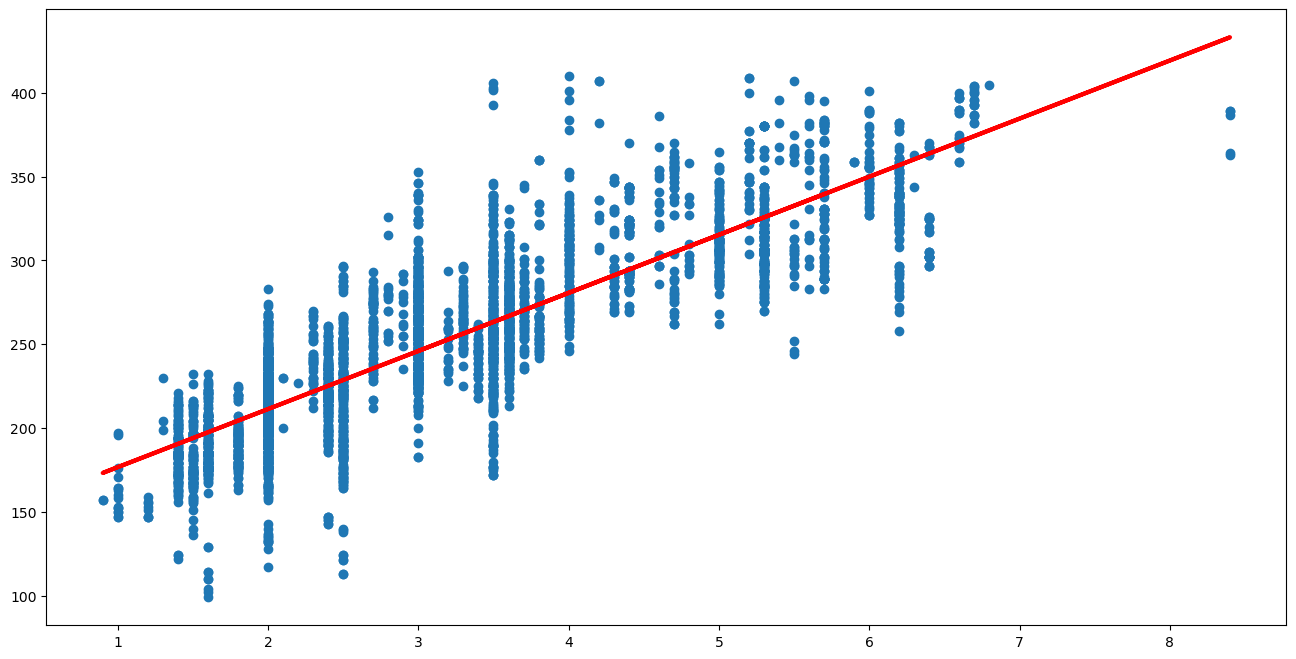

In [8]:
# Formula for the Regression Line
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the linear Regression line
f, axes = plt.subplots(1,1,figsize=(16,8))
plt.scatter(X_train,y_train)
plt.plot(regline_x, regline_y, color ="r", linewidth = 3)
plt.show()

#### Goodness of Fit on Train Data

In [9]:
print("Goodness of Fit of Model \tTrain Dataset")

# Explained Variance (R^2)
r2_train_1 = linreg.score(X_train, y_train)
print("Explained Variance (R^2) \t:", r2_train_1)

# Predict the response on the train set
y_train_pred = linreg.predict(X_train)

# Compute MSE on the train set
mse_train_1 = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error (MSE) \t:", mse_train_1)

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.7229228491189161
Mean Squared Error (MSE) 	: 821.1671527091341


#### Prediction of CO2 Emission (Response) based on the Engine Size (Predictor)
Test the Linear Regression model `linreg` using the Test Set.  

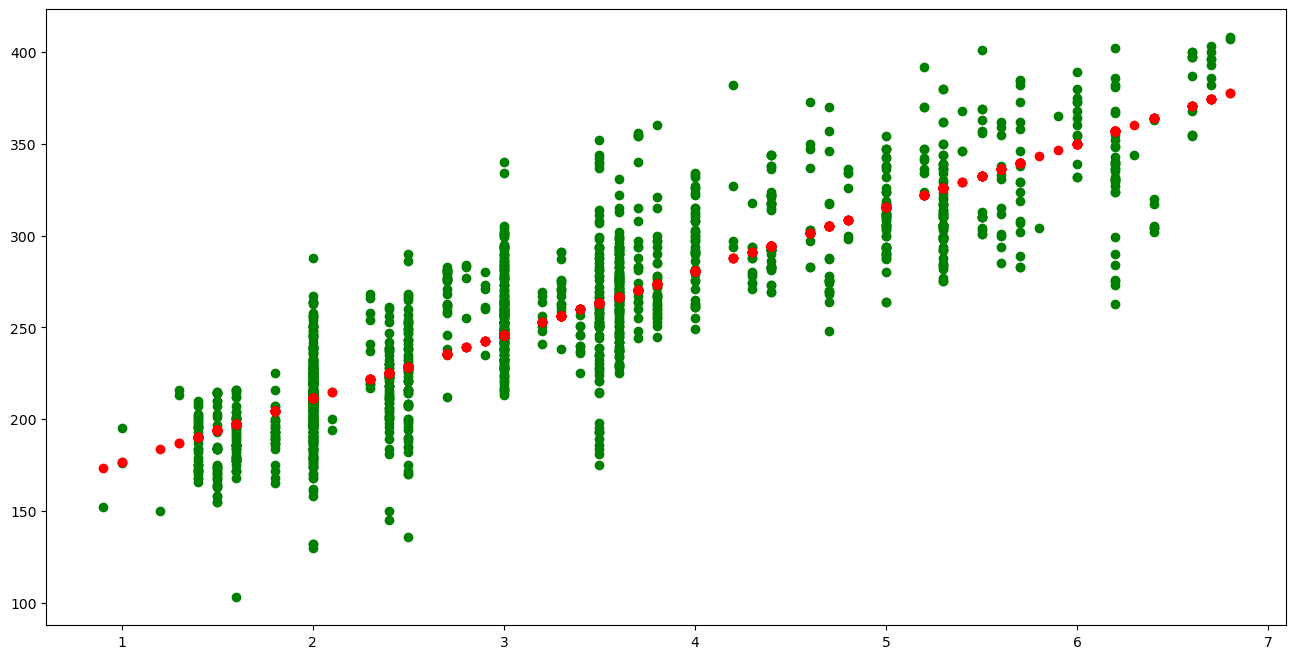

In [10]:
# Predict the response on the test set
y_test_pred = linreg.predict(X_test)

# Plot the Predictions on a Scatterplot
f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

#### Goodness of Fit on Test Data

In [11]:
print("Goodness of Fit of Model \tTest Dataset")
r2_test_1 = linreg.score(X_test, y_test)
print("Explained Variance (R^2) \t:", r2_test_1)
mse_test_1 = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error (MSE) \t:", mse_test_1)

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.7455442292384591
Mean Squared Error (MSE) 	: 722.3884878124503


### Numerical Variable 2: Predicting CO2 Emissions with Cylinders

In [12]:
# Extract Response and Predictors
y = pd.DataFrame(df["CO2 Emissions(g/km)"])
X = pd.DataFrame(df["Cylinders"])

# Split the Dataset into Train(75%) and Test(25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (4473, 1) (4473, 1)
Test Set  : (1492, 1) (1492, 1)


In [13]:
# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

LinearRegression()

In [14]:
# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)

Intercept of Regression 	: b =  [110.69771666]
Coefficients of Regression 	: a =  [[25.01965916]]


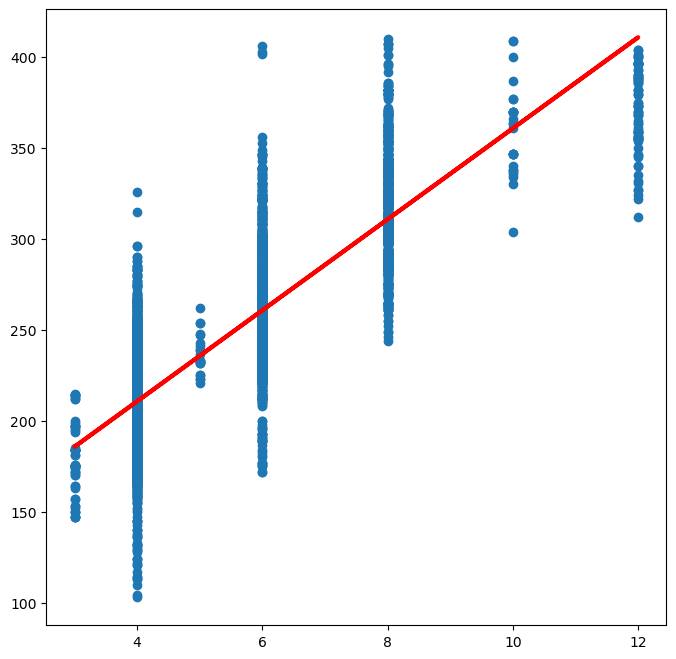

In [15]:
# Formula for the Regression Line
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the linear Regression line
f, axes = plt.subplots(1,1,figsize=(8,8))
plt.scatter(X_train,y_train)
plt.plot(regline_x, regline_y, color ="r", linewidth = 3)
plt.show()

#### Goodness of Fit on Train Data

In [16]:
print("Goodness of Fit of Model \tTrain Dataset")

# Explained Variance (R^2)
r2_train_2 = linreg.score(X_train, y_train)
print("Explained Variance (R^2) \t:", r2_train_2)

# Predict the response on the train set
y_train_pred = linreg.predict(X_train)

# Compute MSE on the train set
mse_train_2 = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error (MSE) \t:", mse_train_2)

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.6949778149245877
Mean Squared Error (MSE) 	: 878.3880826045976


#### Prediction of CO2 Emission (Response) based on the Cylinders (Predictor)
Test the Linear Regression model `linreg` using the Test Set. 

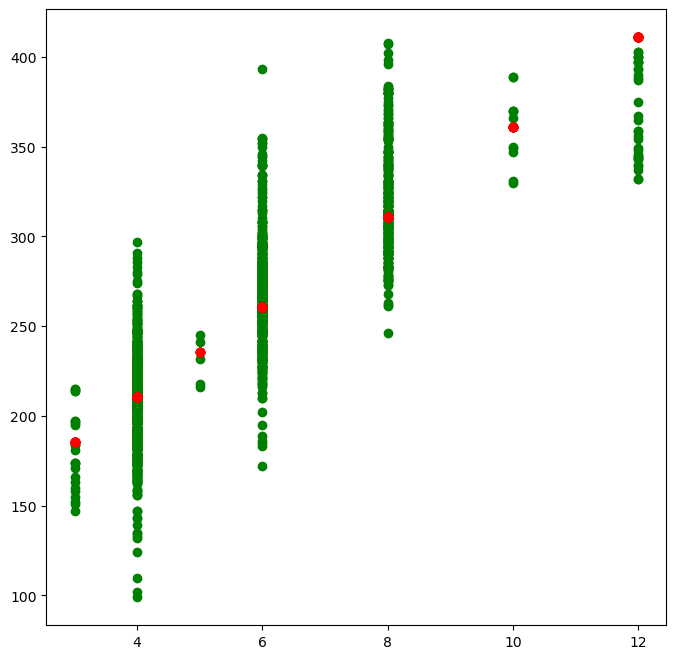

In [17]:
# Predict the response on the test set
y_test_pred = linreg.predict(X_test)

# Plot the Predictions on a Scatterplot
f = plt.figure(figsize=(8, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

#### Goodness of Fit on Test Data

In [18]:
print("Goodness of Fit of Model \tTest Dataset")
r2_test_2 = linreg.score(X_test, y_test)
print("Explained Variance (R^2) \t:", r2_test_2)
mse_test_2 = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error (MSE) \t:", mse_test_2)

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.707817643915375
Mean Squared Error (MSE) 	: 905.961930896824


### Numerical Variable 3: Predicting CO2 Emissions with Fuel Consumption Comb

In [19]:
# Extract Response and Predictors
y = pd.DataFrame(df["CO2 Emissions(g/km)"])
X = pd.DataFrame(df["Fuel Consumption Comb (L/100 km)"])

# Split the Dataset into Train(75%) and Test(25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (4473, 1) (4473, 1)
Test Set  : (1492, 1) (1492, 1)


In [20]:
# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

LinearRegression()

In [21]:
# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)

Intercept of Regression 	: b =  [52.29116359]
Coefficients of Regression 	: a =  [[18.05876677]]


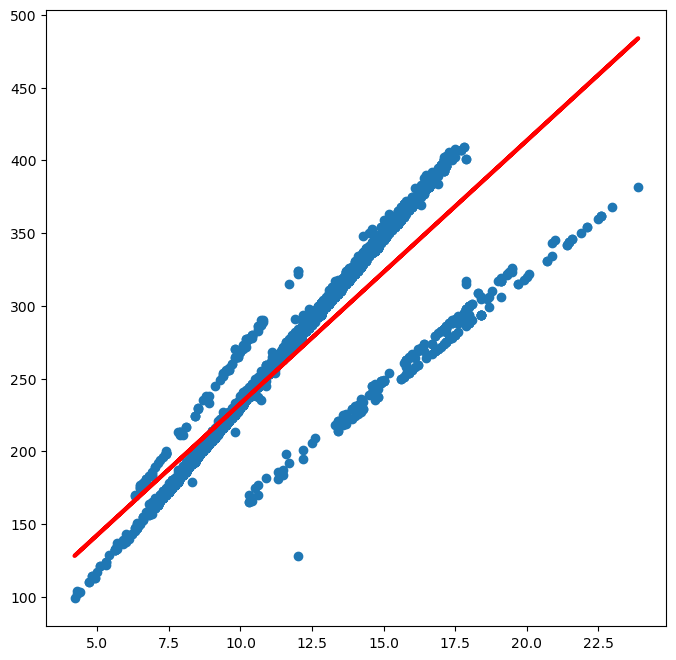

In [22]:
# Formula for the Regression Line
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the linear Regression line
f, axes = plt.subplots(1,1,figsize=(8,8))
plt.scatter(X_train,y_train)
plt.plot(regline_x, regline_y, color ="r", linewidth = 3)
plt.show()

#### Goodness of Fit on Train Data

In [23]:
print("Goodness of Fit of Model \tTrain Dataset")

# Explained Variance (R^2)
r2_train_3 = linreg.score(X_train, y_train)
print("Explained Variance (R^2) \t:", r2_train_3)

# Predict the response on the train set
y_train_pred = linreg.predict(X_train)

# Compute MSE on the train set
mse_train_3 = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error (MSE) \t:", mse_train_3)

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.8197101383724654
Mean Squared Error (MSE) 	: 540.7637953998262


#### Prediction of CO2 Emission (Response) based on the Fuel Consumption Comb (Predictor)
Test the Linear Regression model `linreg` using the Test Set. 

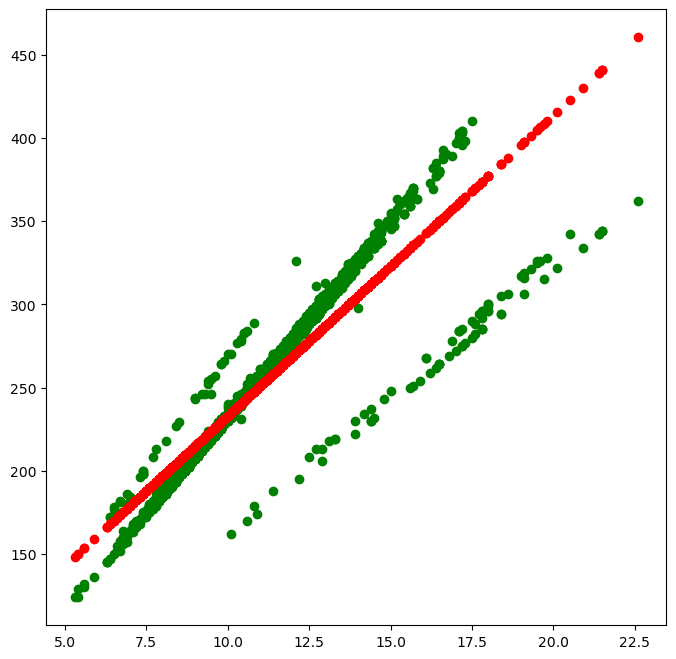

In [24]:
# Predict the response on the test set
y_test_pred = linreg.predict(X_test)

# Plot the Predictions on a Scatterplot
f = plt.figure(figsize=(8, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

#### Goodness of Fit on Test Data

In [25]:
print("Goodness of Fit of Model \tTest Dataset")
r2_test_3 = linreg.score(X_test, y_test)
print("Explained Variance (R^2) \t:", r2_test_3)
mse_test_3 = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error (MSE) \t:", mse_test_3)

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.8002601127170121
Mean Squared Error (MSE) 	: 548.8224548800649


### Numerical Variable 4: Predicting CO2 Emissions with Number of Gears

In [26]:
# Extract Response and Predictors
y = pd.DataFrame(df["CO2 Emissions(g/km)"])
X = pd.DataFrame(df["Number of Gears"])

# Split the Dataset into Train(75%) and Test(25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (4473, 1) (4473, 1)
Test Set  : (1492, 1) (1492, 1)


In [27]:
# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

LinearRegression()

In [28]:
# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)

Intercept of Regression 	: b =  [197.88886344]
Coefficients of Regression 	: a =  [[8.01350666]]


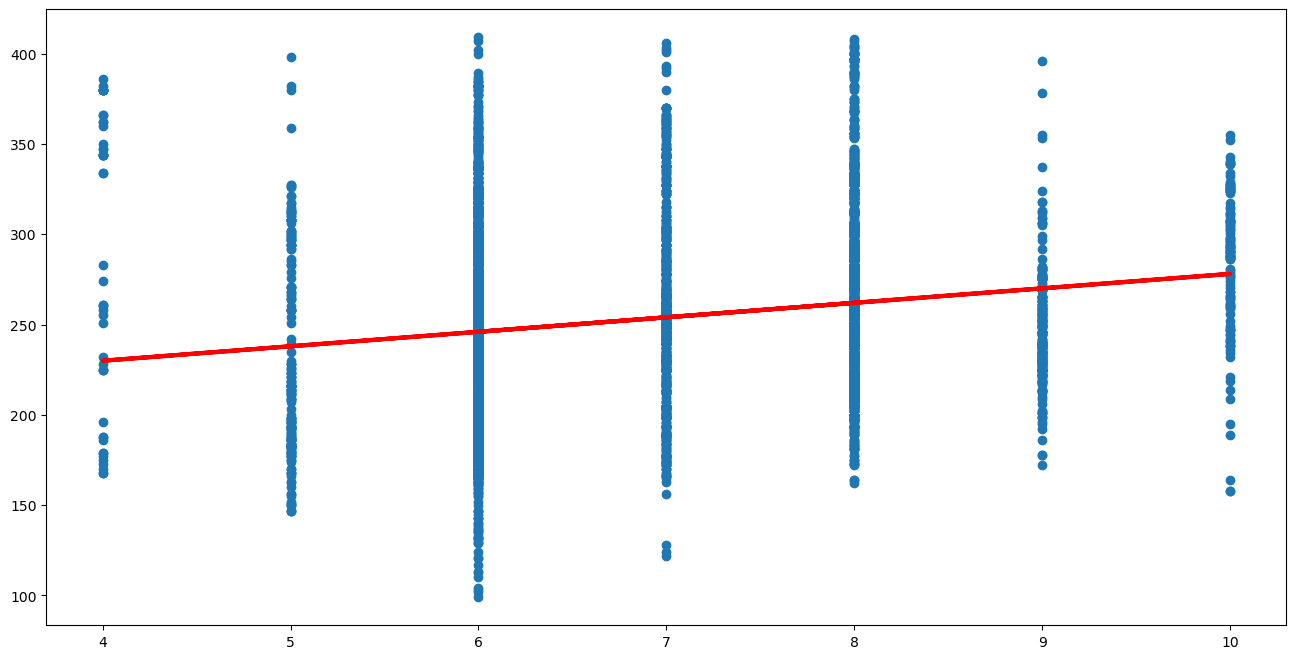

In [29]:
# Formula for the Regression Line
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the linear Regression line
f, axes = plt.subplots(1,1,figsize=(16,8))
plt.scatter(X_train,y_train)
plt.plot(regline_x, regline_y, color ="r", linewidth = 3)
plt.show()

#### Goodness of Fit on Train Data

In [30]:
print("Goodness of Fit of Model \tTrain Dataset")

# Explained Variance (R^2)
r2_train_4 = linreg.score(X_train, y_train)
print("Explained Variance (R^2) \t:", r2_train_4)

# Predict the response on the train set
y_train_pred = linreg.predict(X_train)

# Compute MSE on the train set
mse_train_4 = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error (MSE) \t:", mse_train_4)

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.031727708543262456
Mean Squared Error (MSE) 	: 2868.2623077281146


#### Prediction of CO2 Emission (Response) based on the Number of Gears (Predictor)
Test the Linear Regression model `linreg` using the Test Set. 

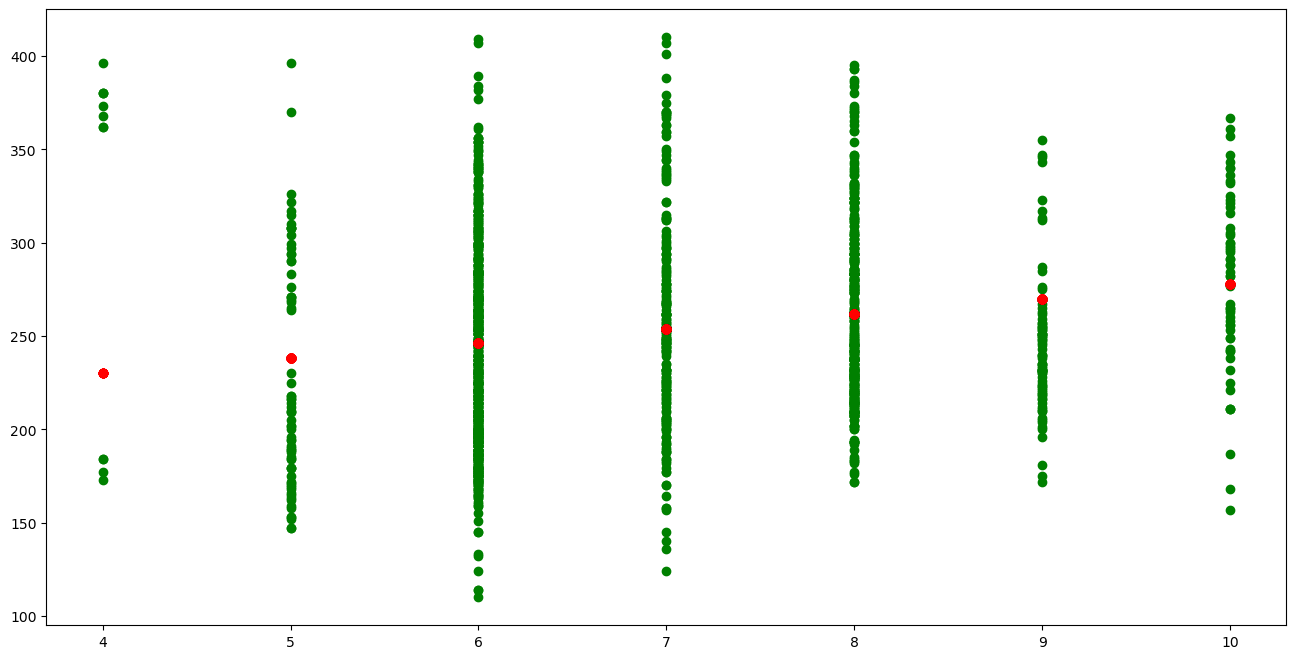

In [31]:
# Predict the response on the test set
y_test_pred = linreg.predict(X_test)

# Plot the Predictions on a Scatterplot
f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

#### Goodness of Fit on Test Data

In [32]:
print("Goodness of Fit of Model \tTest Dataset")
r2_test_4 = linreg.score(X_test, y_test)
print("Explained Variance (R^2) \t:", r2_test_4)
mse_test_4 = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error (MSE) \t:", mse_test_4)

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.02223580447524165
Mean Squared Error (MSE) 	: 2786.467546595631


### Summary of Uni-Variate Linear Regression

In [33]:
print("Predicting CO2 Emissions with Engine Size")
print("Goodness of Fit of Model \tTrain Dataset \t\t\tTest Dataset")
r2_test_4 = linreg.score(X_test, y_test)
print("Explained Variance (R^2) \t:", r2_train_1, "\t\t:", r2_test_1)
mse_test_4 = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error (MSE) \t:", mse_train_1, "\t\t:", mse_test_1)

print()

print("Predicting CO2 Emissions with Cylinders")
print("Goodness of Fit of Model \tTrain Dataset \t\t\tTest Dataset")
r2_test_4 = linreg.score(X_test, y_test)
print("Explained Variance (R^2) \t:", r2_train_2, "\t\t:", r2_test_2)
mse_test_4 = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error (MSE) \t:", mse_train_2, "\t\t:", mse_test_2)

print()

print("Predicting CO2 Emissions with Fuel Consumption Comb")
print("Goodness of Fit of Model \tTrain Dataset \t\t\tTest Dataset")
r2_test_4 = linreg.score(X_test, y_test)
print("Explained Variance (R^2) \t:", r2_train_3, "\t\t:", r2_test_3)
mse_test_4 = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error (MSE) \t:", mse_train_3, "\t\t:", mse_test_3)

print()

print("Predicting CO2 Emissions with Number of Gears")
print("Goodness of Fit of Model \tTrain Dataset \t\t\tTest Dataset")
r2_test_4 = linreg.score(X_test, y_test)
print("Explained Variance (R^2) \t:", r2_train_4, "\t\t:", r2_test_4)
mse_test_4 = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error (MSE) \t:", mse_train_4, "\t\t:", mse_test_4)

Predicting CO2 Emissions with Engine Size
Goodness of Fit of Model 	Train Dataset 			Test Dataset
Explained Variance (R^2) 	: 0.7229228491189161 		: 0.7455442292384591
Mean Squared Error (MSE) 	: 821.1671527091341 		: 722.3884878124503

Predicting CO2 Emissions with Cylinders
Goodness of Fit of Model 	Train Dataset 			Test Dataset
Explained Variance (R^2) 	: 0.6949778149245877 		: 0.707817643915375
Mean Squared Error (MSE) 	: 878.3880826045976 		: 905.961930896824

Predicting CO2 Emissions with Fuel Consumption Comb
Goodness of Fit of Model 	Train Dataset 			Test Dataset
Explained Variance (R^2) 	: 0.8197101383724654 		: 0.8002601127170121
Mean Squared Error (MSE) 	: 540.7637953998262 		: 548.8224548800649

Predicting CO2 Emissions with Number of Gears
Goodness of Fit of Model 	Train Dataset 			Test Dataset
Explained Variance (R^2) 	: 0.031727708543262456 		: 0.02223580447524165
Mean Squared Error (MSE) 	: 2868.2623077281146 		: 2786.467546595631


**Comparing the Explained Variance (R^2) of the train datasets**  
The R^2 of the model to predict CO2 Emission using Fuel Consumption Comb is the greatest. This suggests that the regression equation describes the linear relationship between CO2 Emission and Fuel Consumption Comb the best and it is best fit out of all the Uni-Variate Linear Regression Models.

On the other hand, The R^2 of the model to predict CO2 Emission using Number of Gears is the lowest. This suggests that there is not a strong linear relationship between CO2 Emission and Number of Gears.

**Comparing the Mean Squared Error (MSE) of the train and test datasets**   
The MSE of the model to predict CO2 Emission using Fuel Consumption is the smallest which suggests that it has the highest prediction accuracy.

On the other hand, the MSE of the model to predict CO2 Emission using Number of Gears is the greatest which suggests that it has the lowest prediction accuracy. The regression line plotted is also shown to be almost horizontal, hence R^2 is close to 0.

Hence, we will not include Number of Gears as a predictor as it has almost little to no correlation with CO2 Emission and does not improve the accuracy of our model. It will not contribute meaningfully to predicting CO2 Emissions.

The numerical variables used in our Multi-Variate Linear Regression Model would be Engine Size, Cylinders and Fuel Consumption Comb.

## Multi-Variate Linear Regression

### R^2 vs Adjusted R^2
**R^2 (Explained Variance)**: It is a goodness-of-fit measure. It explains how well the regression equation describes the relationship between the dependent variable and independent variable.  
**Adjusted R^2**: A modified version of R^2 that adjusts for the number of predictors in the model. It takes into account the complexity of the model and provides a more balanced assessment, especially when comparing models with different numbers of predictors.

### With Numerical Variables (without One-Hot Encoding)

In [34]:
# Extract Response and Predictors
y = pd.DataFrame(df["CO2 Emissions(g/km)"])
X = pd.DataFrame(df[["Engine Size(L)","Cylinders","Fuel Consumption Comb (L/100 km)"]])

# Split the Dataset into Train(75%) and Test(25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

Intercept of Regression 	: b =  [61.61792839]
Coefficients of Regression 	: a =  [[ 6.37840261  6.84642581 11.89343922]]

                         Predictors  Coefficients
0                    Engine Size(L)      6.378403
1                         Cylinders      6.846426
2  Fuel Consumption Comb (L/100 km)     11.893439



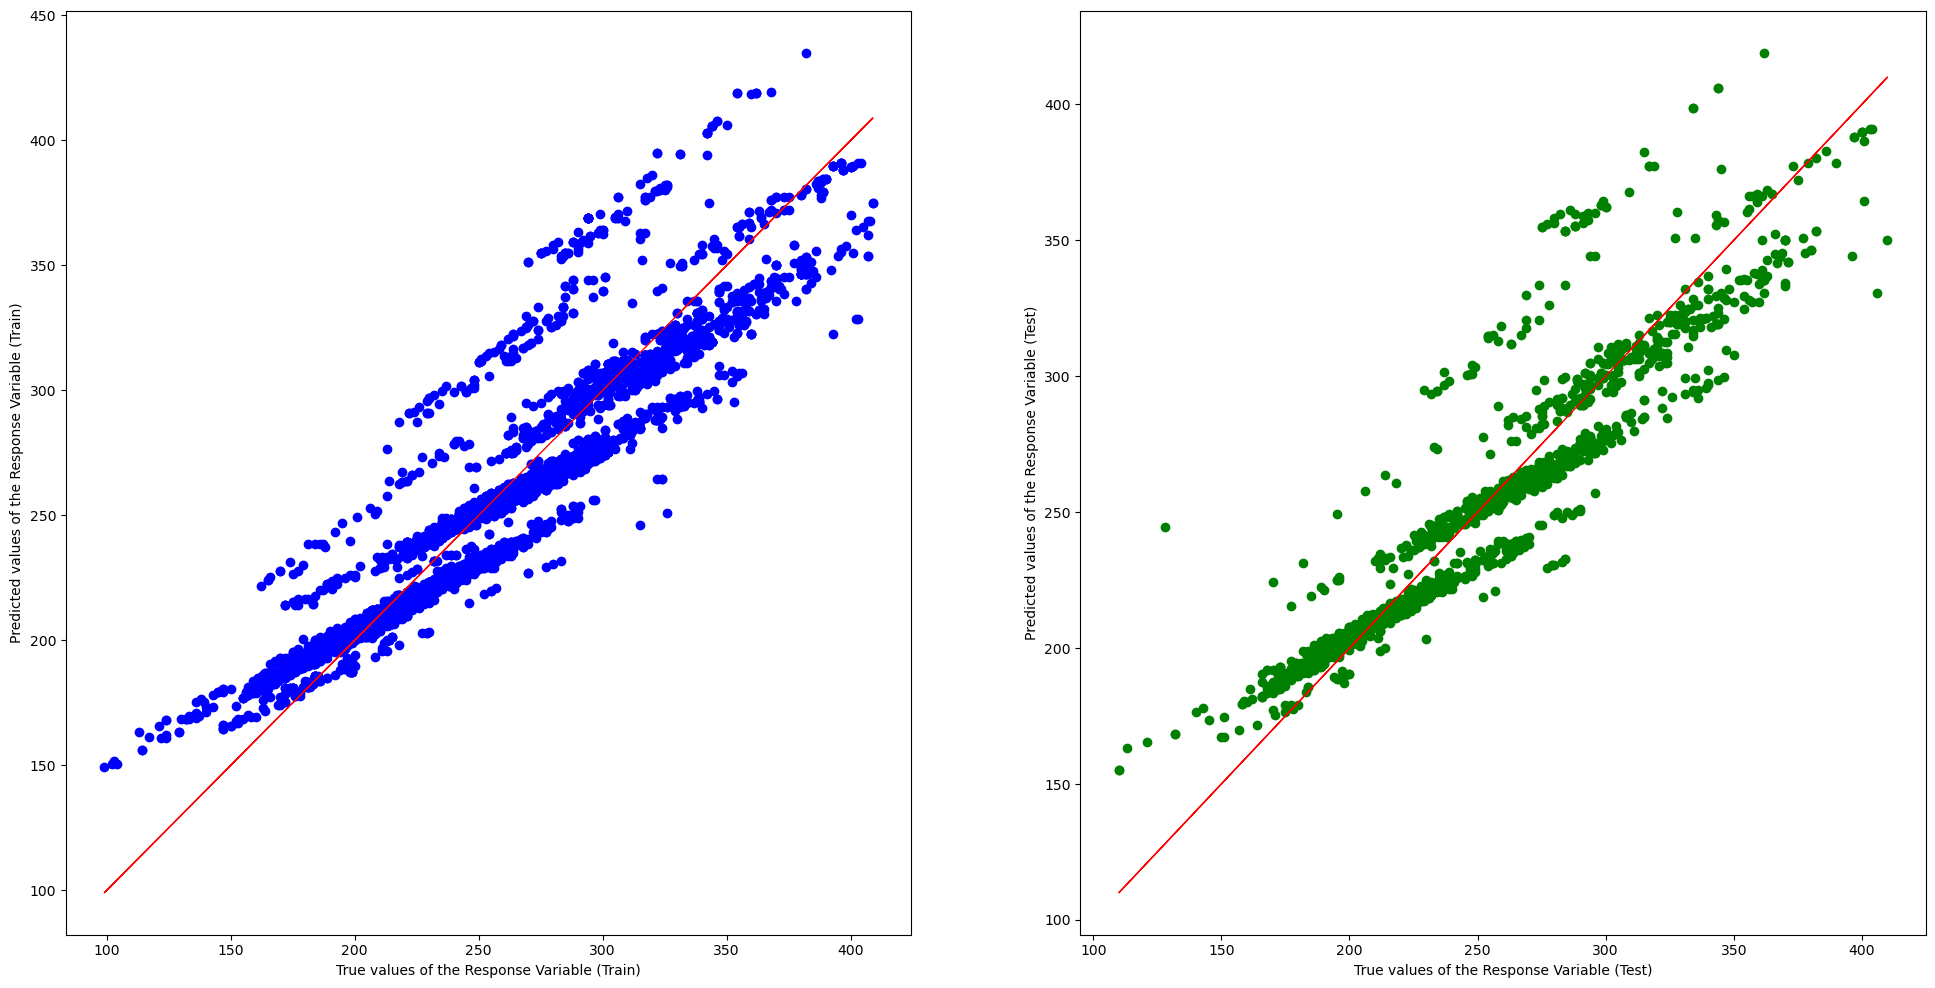

In [35]:
# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [36]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.8660909267694601
Mean Squared Error (MSE) 	: 399.91835234028696

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.8590215492714306
Mean Squared Error (MSE) 	: 392.7761622711623



In [37]:
# Number of observations (total samples)
n_train = X_train.shape[0]
n_test = X_test.shape[0]

# Number of predictors
p = X_train.shape[1]

# Adjusted R^2 on Train Data
adjusted_r2_train = 1 - ((1 - linreg.score(X_train, y_train)) * (n_train - 1) / (n_train - p - 1))

# Adjusted R^2 on Test Data
adjusted_r2_test = 1 - ((1 - linreg.score(X_test, y_test)) * (n_test - 1) / (n_test - p - 1))

# Print Adjusted R^2 and Predicted R^2
print("Adjusted R^2 on Train Data \t:", adjusted_r2_train)
print("Adjusted R^2 on Test Data \t:", adjusted_r2_test)

Adjusted R^2 on Train Data 	: 0.8660010347981708
Adjusted R^2 on Test Data 	: 0.8587373185239939


### With Numerical and Categorical Variables (with One-Hot Encoding)

In [44]:
# Extract Response and Predictors
y = pd.DataFrame(df["CO2 Emissions(g/km)"])
X = df.drop(columns=['CO2 Emissions(g/km)','Number of Gears'])

# Split the Dataset into Train(75%) and Test(25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

Intercept of Regression 	: b =  [-28.08176608]
Coefficients of Regression 	: a =  [[  0.11527521   0.5184618   22.41467336   0.69332189   2.26587063
    0.98982868   0.55262054   2.20190405   4.21399726   2.36213559
    5.76773829   1.38051034   0.34938308   0.96242363   2.11356698
    1.50016989   1.14576953 -15.52803773 -10.97120265   0.24770703
    0.57608873   0.55904508  -1.24406444  -0.1387764   62.15265739
  -78.82326966 -48.65922095  32.48673316  32.84310006]]

                                Predictors  Coefficients
0                           Engine Size(L)      0.115275
1                                Cylinders      0.518462
2         Fuel Consumption Comb (L/100 km)     22.414673
3                    Vehicle Class_COMPACT      0.693322
4                  Vehicle Class_FULL-SIZE      2.265871
5                   Vehicle Class_MID-SIZE      0.989829
6                Vehicle Class_MINICOMPACT      0.552621
7                    Vehicle Class_MINIVAN      2.201904
8       Vehic

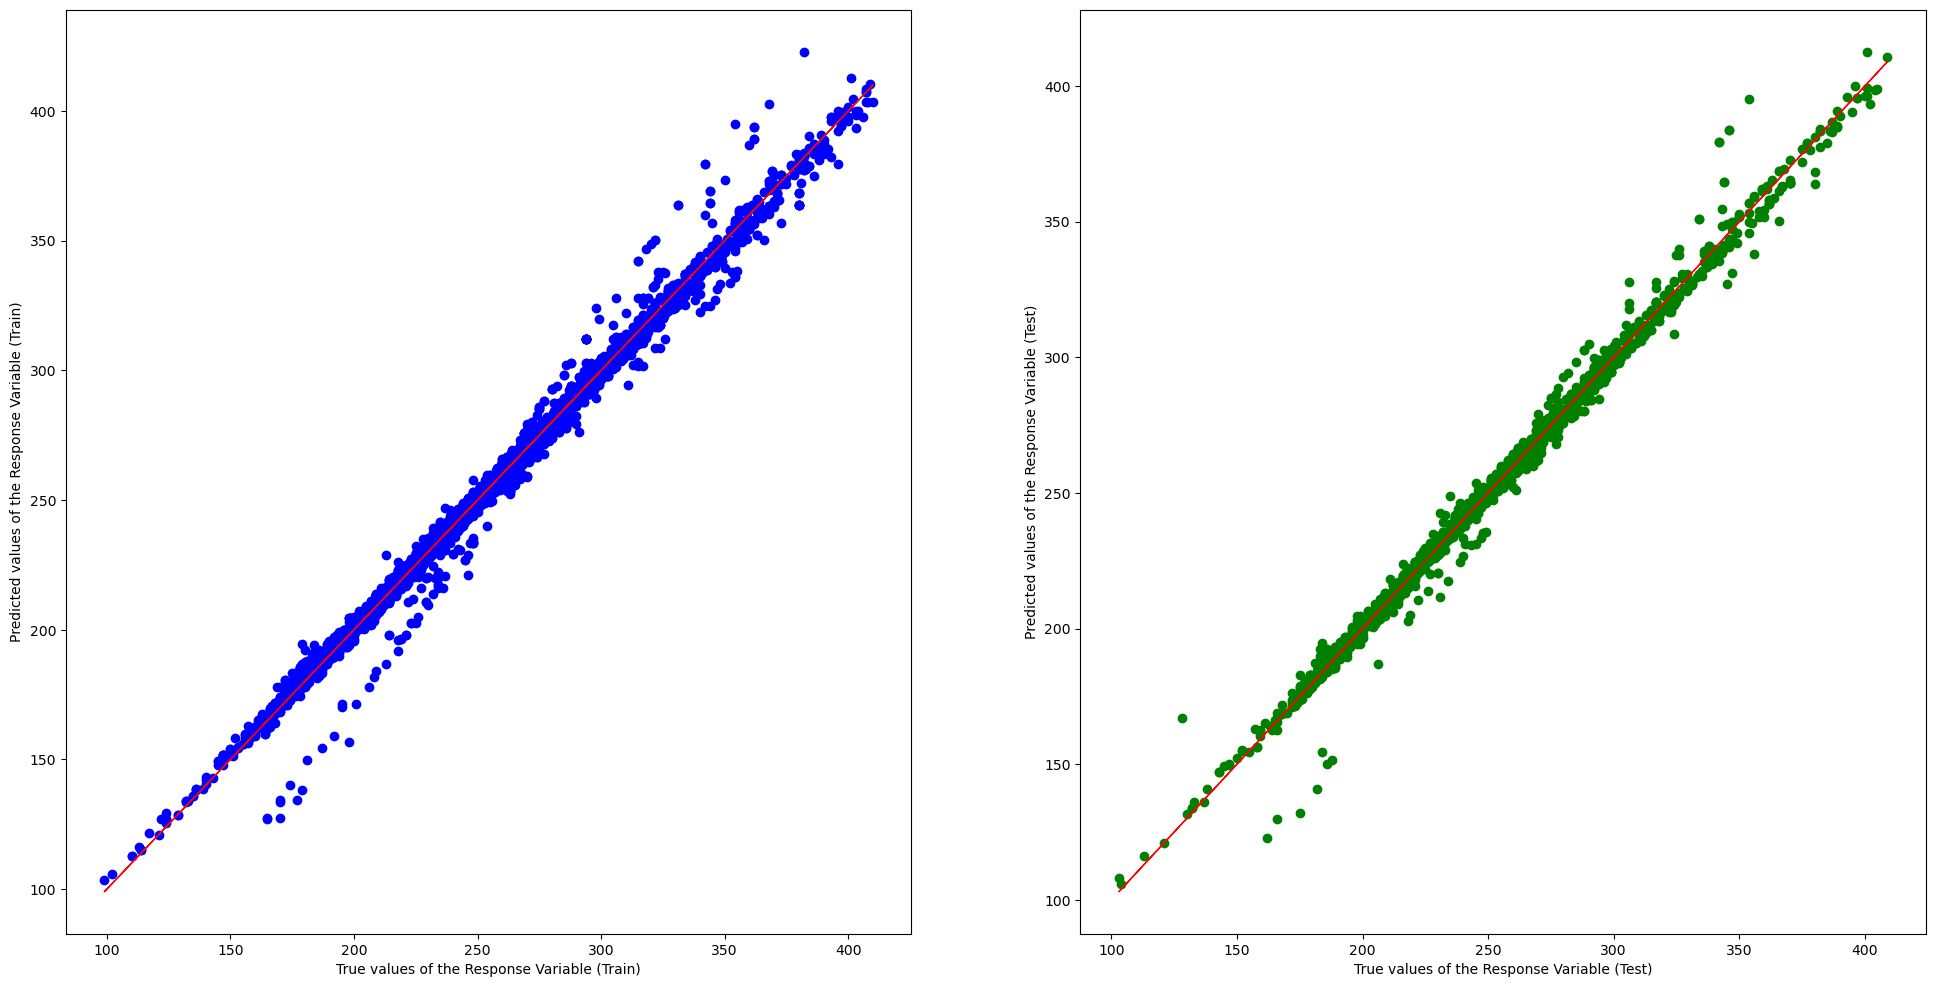

In [45]:
# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [46]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9917045617513961
Mean Squared Error (MSE) 	: 24.39412172080242

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9905600945040212
Mean Squared Error (MSE) 	: 27.593206338292976



In [47]:
# Number of observations (total samples)
n_train = X_train.shape[0]
n_test = X_test.shape[0]

# Number of predictors
p = X_train.shape[1]

# Adjusted R^2 on Train Data
adjusted_r2_train = 1 - ((1 - linreg.score(X_train, y_train)) * (n_train - 1) / (n_train - p - 1))

# Adjusted R^2 on Test Data
adjusted_r2_test = 1 - ((1 - linreg.score(X_test, y_test)) * (n_test - 1) / (n_test - p - 1))

# Print Adjusted R^2 and Predicted R^2
print("Adjusted R^2 on Train Data \t:", adjusted_r2_train)
print("Adjusted R^2 on Test Data \t:", adjusted_r2_test)

Adjusted R^2 on Train Data 	: 0.9916504164195912
Adjusted R^2 on Test Data 	: 0.9903728460365907


There is a considerable difference between the Multi-Variate Linear Regression with Numerical and Categorical Variables and Multi-Variate Linear Regression with Numerical Variables only. 

The adjusted R^2 has improved from 0.86 to 0.99 when the Categorical Variables (encoded) are considered. A R^2 value of 0.99 means that the model almost fits perfectly. MSE has also decreased which means prediction accuracy has improved. It is also worth noting that the MSE values for both train and test are relatively similar, suggesting that the model's performance on unseen test data is consistent with its performance on the training data. Hence, it is not overfitted.